In [1]:
import os
import requests
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
df = pd.read_csv('mcdonalds.csv')
df.columns
df = df.replace({"Yes": 1, "No": 0})
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [3]:
print(df.describe())

             yummy   convenient        spicy    fattening       greasy  \
count  1453.000000  1453.000000  1453.000000  1453.000000  1453.000000   
mean      0.552650     0.907777     0.093599     0.867171     0.526497   
std       0.497391     0.289440     0.291371     0.339506     0.499469   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     1.000000     0.000000   
50%       1.000000     1.000000     0.000000     1.000000     1.000000   
75%       1.000000     1.000000     0.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              fast        cheap        tasty    expensive      healthy  \
count  1453.000000  1453.000000  1453.000000  1453.000000  1453.000000   
mean      0.900206     0.598761     0.644184     0.357880     0.198899   
std       0.299828     0.490318     0.478925     0.479542     0.399309   
min       0.000000     0.000000     0

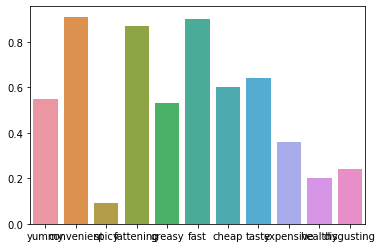

In [4]:
df1 = df.iloc[:, :11]
temp = df1.mean().round(2)
temp
sns.barplot(x=temp.index, y=temp);

In [5]:
scaler = StandardScaler()
df2 = scaler.fit_transform(df1)

pca = PCA()
df2 = pca.fit_transform(df2)

pca_df = pd.DataFrame(df2, columns=df1.columns)
pca_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


In [6]:
pca_df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03
mean,5.593140e-17,8.466119e-17,-3.323792e-18,-5.488078e-17,-4.515773e-17,-1.176699e-17,6.311385e-17,1.665717e-17,-7.824283e-17,-7.775573e-17,3.786067e-17
std,1.677250e+00,1.277868e+00,1.175207e+00,1.040053e+00,9.586196e-01,8.846128e-01,8.457741e-01,7.698704e-01,7.240648e-01,5.548094e-01,5.069825e-01
min,-2.883694e+00,-2.229399e+00,-1.852180e+00,-1.481192e+00,-2.808926e+00,-2.775970e+00,-2.791864e+00,-2.037274e+00,-2.291970e+00,-1.596087e+00,-1.788916e+00
25%,-1.082756e+00,-8.196100e-01,-8.166025e-01,-7.415504e-01,-6.594894e-01,-6.525637e-01,-5.180840e-01,-4.690456e-01,-4.512112e-01,2.327974e-02,-6.189398e-02
50%,-2.275531e-01,-4.300592e-02,-1.739581e-01,-1.634068e-01,-2.368836e-02,-6.102541e-02,3.398968e-02,2.066852e-01,9.809878e-02,1.212930e-01,5.602312e-02
75%,1.079822e+00,9.227436e-01,6.062742e-01,1.380806e-01,4.441573e-01,4.651667e-01,6.711110e-01,5.707646e-01,4.033967e-01,1.917207e-01,1.920805e-01
max,4.566454e+00,4.102422e+00,4.199369e+00,4.202991e+00,3.606405e+00,4.201958e+00,3.693790e+00,2.829568e+00,2.462379e+00,1.849848e+00,1.834070e+00


In [7]:
pd.DataFrame(
    pca.components_, 
    columns=[f'PC{i}' for i in range(1, 12)], 
    index=pca_df.columns
)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.406955,-0.308827,-0.023320,0.177861,0.267796,-0.213039,-0.289134,-0.426115,0.290944,-0.266839,0.410744
convenient,0.282615,-0.045682,0.069982,-0.205590,-0.136300,-0.282441,-0.575032,0.242199,0.567528,0.201031,-0.143888
spicy,-0.259588,-0.317151,0.020170,-0.608077,-0.389568,-0.211395,0.125157,-0.269648,-0.183298,0.367814,0.090299
fattening,0.026237,-0.009424,0.845496,-0.023396,0.330854,0.090363,0.114477,0.072691,0.035510,0.301990,0.235231
greasy,0.346857,-0.437148,-0.185551,0.086934,0.343713,-0.568939,0.256981,0.286099,-0.207362,0.051787,0.105843
fast,-0.124916,0.188966,0.438661,0.107520,-0.278329,-0.572734,0.020657,-0.053053,-0.171160,-0.446166,-0.328041
cheap,0.159878,-0.661814,0.214188,-0.023851,-0.307300,0.392436,-0.008895,0.197364,0.015198,-0.449446,-0.017070
tasty,0.016587,0.150033,-0.027835,-0.720478,0.487275,0.055976,-0.064667,0.059289,-0.061727,-0.446110,-0.079122
expensive,-0.195341,-0.336539,0.025239,0.105052,0.346137,0.099235,-0.062027,-0.213587,-0.009675,0.219269,-0.780777
healthy,0.691446,0.028831,0.058187,-0.020311,-0.015160,0.017917,0.060323,-0.713426,0.029581,-0.054544,-0.016028


Standard deviations (1, .., p=11):
[1.7 1.3 1.2 1.  1.  0.9 0.8 0.8 0.7 0.6 0.5]

Rotation (n x k) = (11 x 11):


<AxesSubplot:>

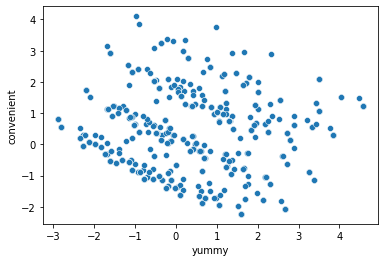

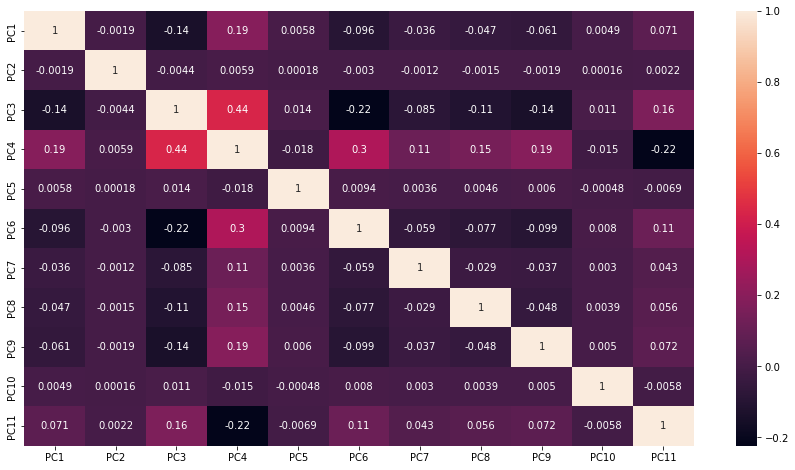

In [8]:
sns.scatterplot(data=pca_df, x='yummy', y='convenient');
plt.figure(figsize=(15, 8))
rotation = pca.components_.T

features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
            'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
rotation_df = pd.DataFrame(rotation, index=features, columns=[f'PC{i+1}' for i in range(rotation.shape[1])])
std_devs = np.sqrt(pca.explained_variance_)
std_devs_rounded = np.round(std_devs, 1)
rotation_df_rounded = rotation_df.round(3)

print("Standard deviations (1, .., p=11):")
print(std_devs_rounded)
print("\nRotation (n x k) = (11 x 11):")
rotation_df_rounded
sns.heatmap(rotation_df.corr(), annot = True)

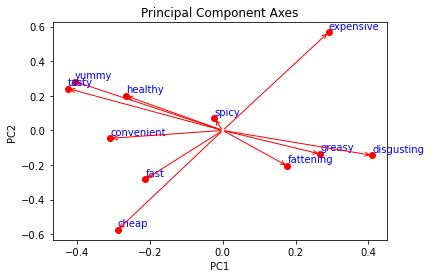

In [9]:
# plt.scatter(x=pca_df['yummy'], y=pca_df['convenient'])

scale = 1

for i,j in enumerate(pca_df.columns):
    plt.text(
        pca.components_[0, :][i]*scale, 
        (pca.components_[1, :][i]+0.02)*scale, 
        j, color='blue'
    )
    # plt.arrow(0, 0, pca.components_[0, :][i]*scale, pca.components_[1, :][i]*scale, color='red')
    plt.annotate(
        '', xytext=(0, 0), 
        xy=(pca.components_[0, :][i]*scale, 
        pca.components_[1, :][i]*scale), 
        arrowprops=dict(
            arrowstyle="->", 
            color='red'
        )
    )
plt.scatter(
    pca.components_[0, :]*scale, 
    pca.components_[1, :]*scale, 
    color='red'
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Axes')
plt.show()

In [10]:
np.random.seed(0)

In [11]:
k_range = range(2, 9)
inertias = []
k_result = []
silhouette_scores = []
for k in k_range:
    model = KMeans(
        n_clusters=k, 
        n_init=10, 
        random_state=0)
    model.fit(pca_df)
    labels = model.predict(pca_df)
    silhouette_score_ = silhouette_score(
        pca_df, 
        labels
    )
    silhouette_scores.append(silhouette_score_)
    inertias.append(model.inertia_)
    k_result.append(labels)

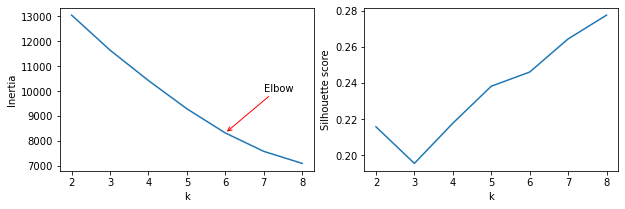

In [12]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 3)
axs[0].plot(range(2, 9), inertias)
axs[0].annotate(
    'Elbow', xytext=(7, 10000), xy=(6, inertias[4]), 
    arrowprops=dict(arrowstyle="->", color='red'))
axs[1].plot(range(2, 9), silhouette_scores)
axs[0].set(xlabel='k', ylabel='Inertia')
axs[1].set(xlabel='k', ylabel='Silhouette score');

In [13]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


C:\Users\amish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


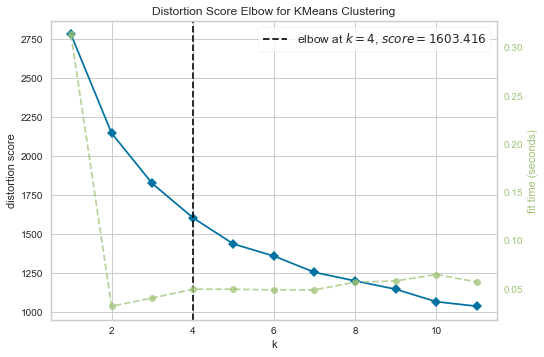

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df1)
visualizer.show()

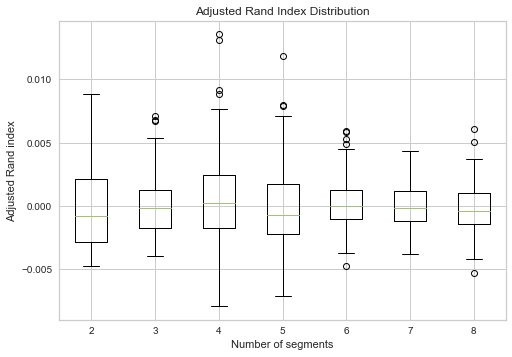

In [15]:
n_boot = 100
ARI_scores = []
for labels in k_result:
    ari_boot = []
    for _ in range(n_boot):
        random_sample = np.random.choice(
            labels, 
            size=len(labels), 
            replace=True
        )
        ari = adjusted_rand_score(
            labels, 
            random_sample
        )
        ari_boot.append(ari)
    ARI_scores.append(ari_boot)

plt.boxplot(ARI_scores, labels=range(2, 9))
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Adjusted Rand Index Distribution')
plt.show()

In [16]:
gmm = GaussianMixture(
    n_components=4, 
    covariance_type='full', 
    random_state=1234
)
gmm.fit(pca_df)

cluster_assignments_gmm = gmm.predict(pca_df)

model = KMeans(
    n_clusters=4, 
    n_init=10, 
    random_state=0
)
model.fit(pca_df)
labels = model.predict(pca_df)

conf_matrix = confusion_matrix(
    labels, 
    cluster_assignments_gmm
)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[116   4   0  96]
 [  7 163  97   3]
 [  6  71 268 269]
 [  5  55 222  71]]


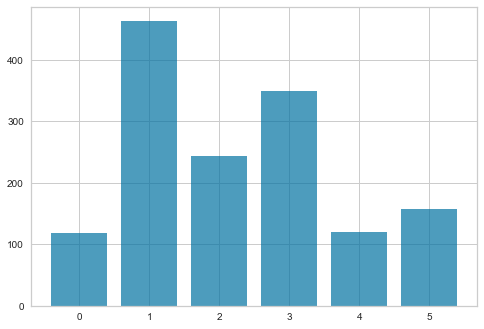

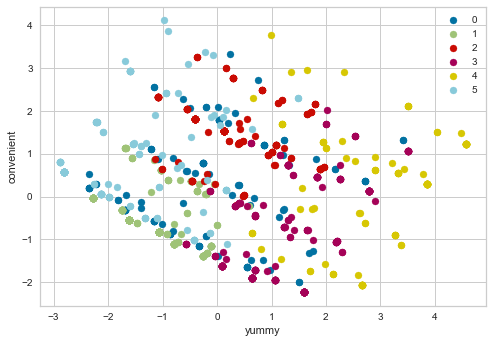

In [17]:
k6 = KMeans(n_clusters=6)
k6.fit(pca_df)
l6 = k6.predict(pca_df)

x = range(6)
height = []
for i in range(6):
    height.append(sum(l6 == i))
plt.bar(x, height, alpha=0.7);
plt.show()

for i in range(6):
    temp = pca_df[['yummy', 'convenient']][l6 == i]
    plt.scatter(
        temp['yummy'], 
        temp['convenient'], 
        label=i
    )
plt.xlabel('yummy')
plt.ylabel('convenient')
plt.legend();
plt.show()

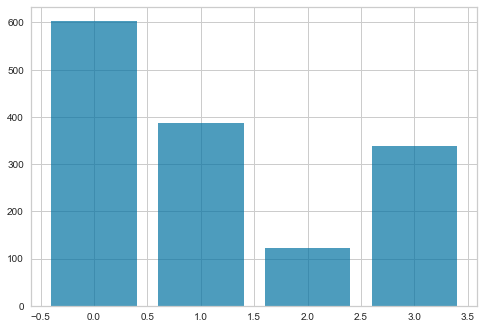

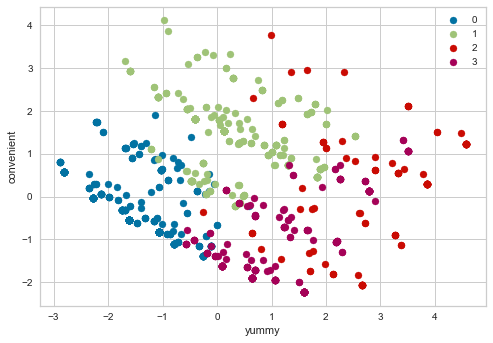

In [18]:
k4 = KMeans(n_clusters=4)
k4.fit(pca_df)
l4 = k4.predict(pca_df)

x = range(4)
height = []
for i in range(4):
    height.append(sum(l4 == i))
plt.bar(x, height, alpha=0.7);
plt.show()

for i in range(4):
    temp = pca_df[['yummy', 'convenient']][l4 == i]
    plt.scatter(
        temp['yummy'], 
        temp['convenient'], 
        label=i
    )
plt.xlabel('yummy')
plt.ylabel('convenient')
plt.legend();
plt.show()

In [19]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [20]:
df2 = df
df2['segments'] = l4
df2.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,3
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,1
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,1
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,3


In [21]:
df2.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'segments'],
      dtype='object')

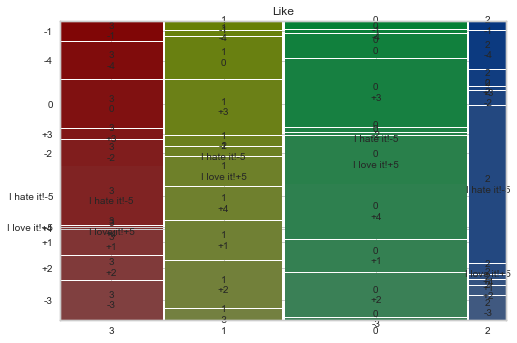

In [22]:
mosaic(df2, ['segments', 'Like'], title='Like');
plt.show()


In [23]:
df2.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,3
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,1
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,1


In [24]:
df2.Like.unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [25]:
df2.Like = df2.Like.str.extract(r'([-\d]+)').astype(int)
df2.VisitFrequency.unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [26]:
df2.VisitFrequency = df2.VisitFrequency.replace({
    'Every three months':1/(4*3), 
    'Once a week':1, 
    'Once a month':1/4, 
    'Once a year':1/52,
    'More than once a week':2, 
    'Never':0
})
df2.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0.083333,Female,3
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0.083333,Female,1
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0.083333,Female,1


C:\Users\amish\AppData\Local\Temp\ipykernel_10512\64935270.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label="Female Proportion")


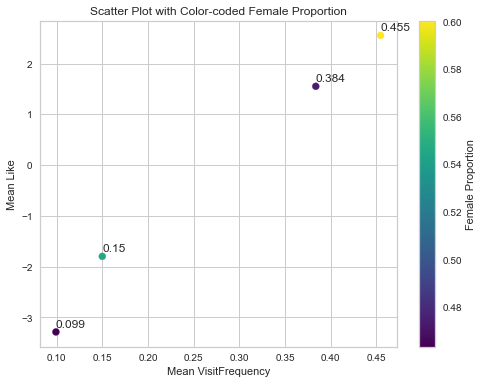

In [27]:
visit_means = (df2.groupby("segments")["VisitFrequency"]
               .mean())
like_means = df2.groupby("segments")["Like"].mean()
female_means = (df2.groupby("segments")["Gender"]
                .apply(lambda x: (x == "Female")
                .mean()))

plt.figure(figsize=(8, 6))
plt.scatter(
    visit_means, 
    like_means, 
    c=female_means, 
    cmap="viridis"
)
plt.xlabel("Mean VisitFrequency")
plt.ylabel("Mean Like")
plt.title("Scatter Plot with Color-coded Female Proportion")
plt.colorbar(label="Female Proportion")
for i,j,k in zip(
    visit_means, 
    like_means, 
    visit_means
):
    plt.text(i, j+0.1, round(k, 3))
plt.show()